# Data Analysis Demonstration Projects

## 1. Customer Financial Access

### 1.1 Credit Scoring
Data Source: https://www.kaggle.com/datasets/rassiem/credit-data/data

Branch: ML

Model: Gradient Boosting Regressor (GBR)

Methods: Regression

<ipython-input-1-8056992928bb>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


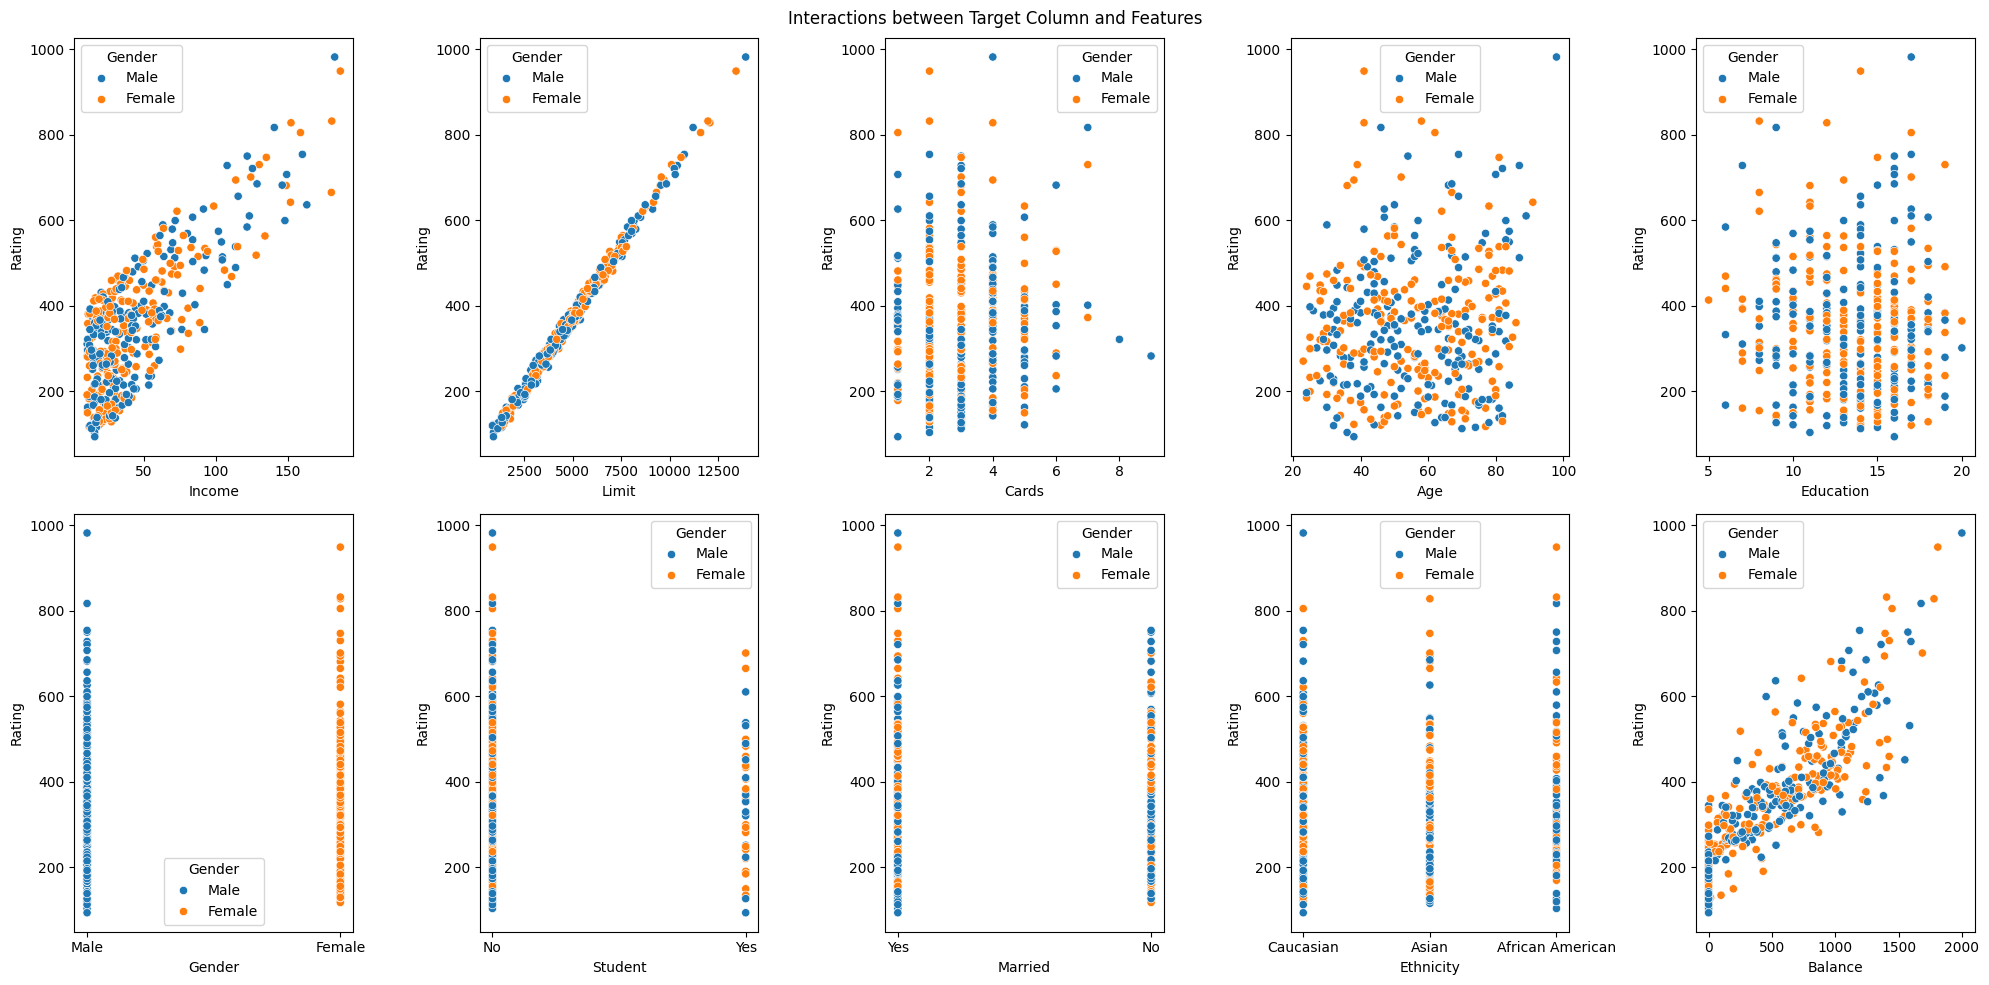

Mean Squared Error: 168.50285131452105


FloatText(value=0.0, description='Income:')

FloatText(value=0.0, description='Limit:')

FloatText(value=0.0, description='Age:')

FloatText(value=0.0, description='Cards:')

FloatText(value=0.0, description='Education:')

FloatText(value=0.0, description='Married:')

Dropdown(description='Eth_Asian:', options=(0, 1), value=0)

Dropdown(description='Eth_Caucasian:', options=(0, 1), value=0)

Button(description='Predict Rating', style=ButtonStyle())

In [1]:
# Common Imported Libraries:
import numpy as np
import pandas as pd

# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import ipywidgets as widgets
from IPython.display import display

# Read dataset, excluding the 'ID' column
data = pd.read_csv('Credit_Data.csv', usecols=lambda col: col != 'ID')

# Clean dataset and create scatter plots
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(data.columns.drop('Rating')):
    sns.scatterplot(data=data, x=col, y='Rating', hue='Gender', ax=axes[i])
fig.suptitle('Interactions between Target Column and Features')
plt.tight_layout()
plt.show()

# One-hot encoding
df = data.join(pd.get_dummies(data[data.select_dtypes(include='object').columns], drop_first=True).astype('int8'))
df.drop(data.select_dtypes(include=['object']).columns.tolist(), axis=1, inplace=True)

# Split data into training and testing sets
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor & Evaluate it
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Creat a Credit Scoring Tool
features = ['Income', 'Limit', 'Age', 'Cards', 'Education', 'Married', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
inputs = {}
for feature in features:
    if feature == 'Ethnicity_Asian':
        inputs[feature] = widgets.Dropdown(options=[0, 1], value=0, description='Eth_Asian:')
    elif feature == 'Ethnicity_Caucasian':
        inputs[feature] = widgets.Dropdown(options=[0, 1], value=0, description='Eth_Caucasian:')
    else:
        inputs[feature] = widgets.FloatText(value=0.0, description=feature + ':')

def on_ethnicity_change(change):
    if inputs['Ethnicity_Asian'].value == 1:
        inputs['Ethnicity_Caucasian'].value = 0
        inputs['Ethnicity_Caucasian'].disabled = True
    else:
        inputs['Ethnicity_Caucasian'].disabled = False

inputs['Ethnicity_Asian'].observe(on_ethnicity_change, names='value')
inputs['Ethnicity_Caucasian'].observe(on_ethnicity_change, names='value')

for feature, widget in inputs.items():
    display(widget)

submit_button = widgets.Button(description='Predict Rating')
display(submit_button)

def on_submit_clicked(b):
    input_data = {feature: widget.value for feature, widget in inputs.items()}
    input_df = pd.DataFrame([input_data])
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    input_df = input_df[X_train.columns]
    predicted_rating = gbr.predict(input_df)
    print(f'Predicted Credit Rating: {predicted_rating[0]}')

submit_button.on_click(on_submit_clicked)

### Interpretation:
This project constructs a credit rating prediction system using a Gradient Boosting Regressor. It offers interactive scatter plots that visualize the relationship between different features and credit ratings, while also allowing users to predict their credit rating through an interactive input widget. The widget accepts personal data and outputs a predicted credit rating. This tool has significant value for banks and financial institutions by providing both data visualization and a way for automated and personalized credit risk assess-ment and management.


### 1.2 Loan Approval
Data Source: https://www.kaggle.com/datasets/krishnaraj30/finance-loan-approval-prediction-data/data

Branch: ML

Models: Decision Tree Classifier (DTC)

Method: Binary Classification


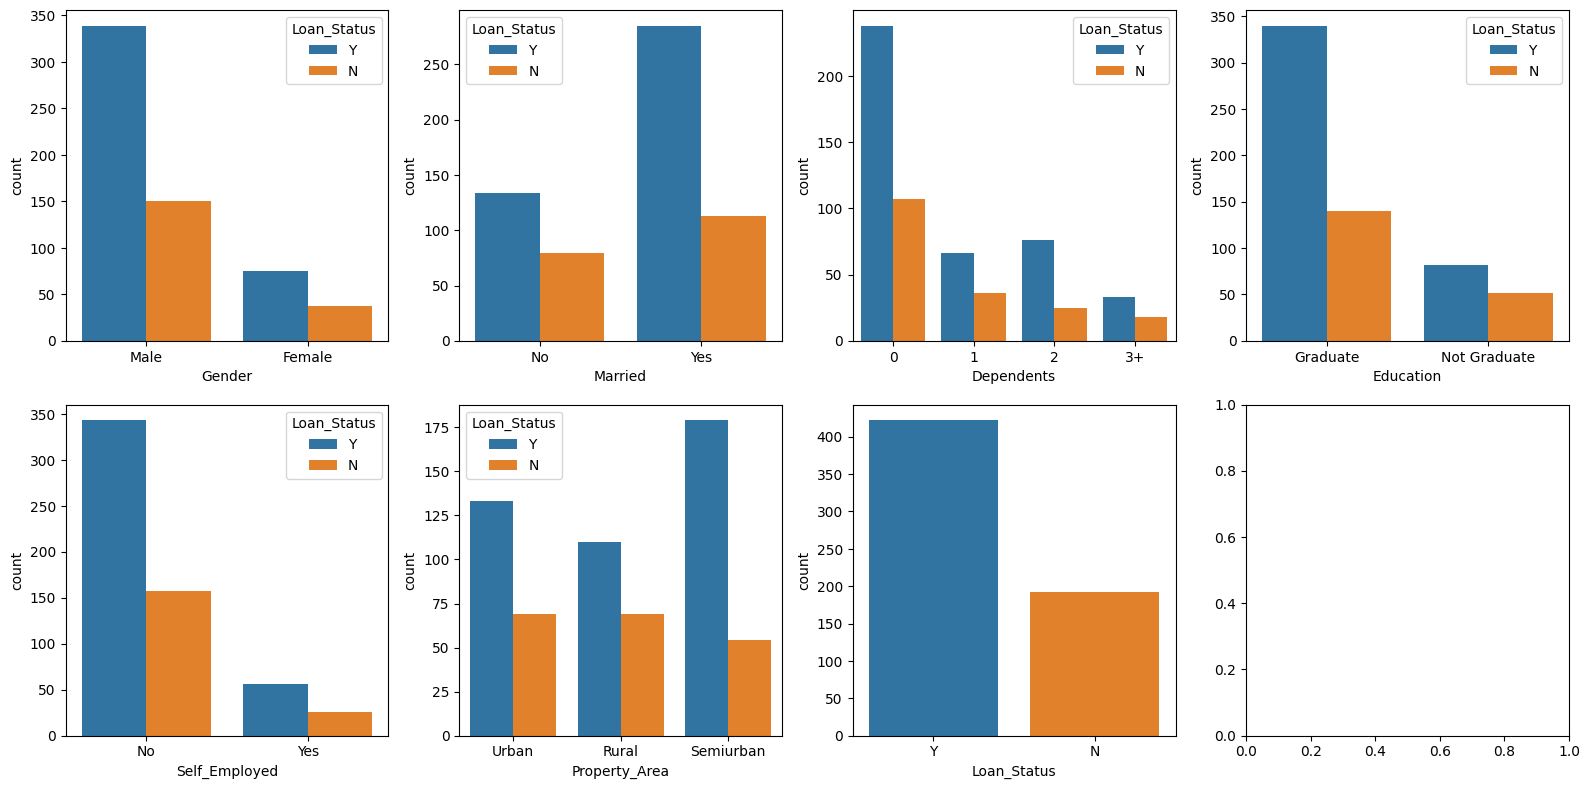

Test Accuracy:  0.8455284552845529
Test F1 Score:  0.8972972972972973
Test Recall:  0.9764705882352941
Test Precision:  0.83


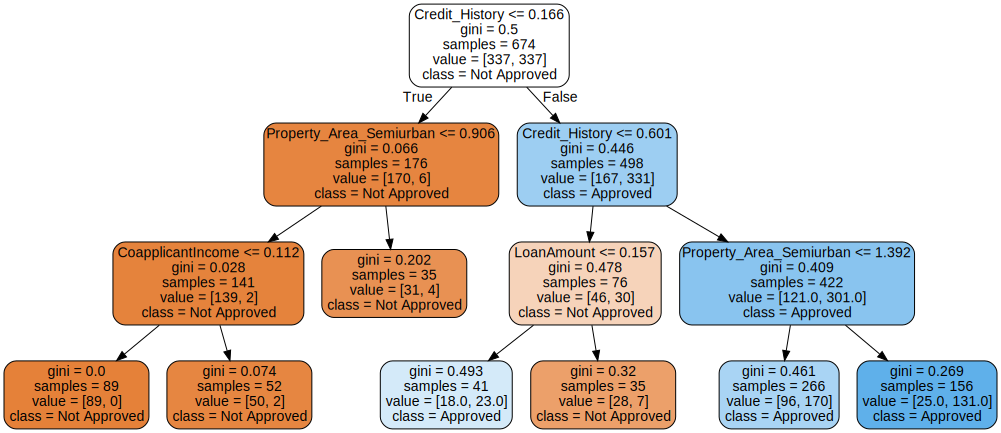

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Dropdown(description='Married:', options=('No', 'Yes'), value='No')

Dropdown(description='Dependents:', options=('0', '1', '2', '3+'), value='0')

Dropdown(description='Education:', options=('Not Graduate', 'Graduate'), value='Not Graduate')

Dropdown(description='SelfEmp:', options=('No', 'Yes'), value='No')

IntText(value=0, description='AppInc:')

IntText(value=0, description='CoAppInc:')

IntText(value=0, description='LoanAmt:')

IntText(value=0, description='AmtTerm:')

Dropdown(description='CredHist:', options=('0', '1'), value='0')

Dropdown(description='PropArea:', options=('Rural', 'Semiurban', 'Urban'), value='Rural')

Button(description='Predict Loan Status', style=ButtonStyle())

Output()

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
import graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler  # Added this line for StandardScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# Read dataset
df = pd.read_csv('Loan_Approval.csv').drop(columns=['Loan_ID'])
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, drop_first=True)

# Split dataset & Preprocess
X = df_encoded.drop(columns='Loan_Status_Y')
y = df_encoded['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data visualization: plot distribution of categorical features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows and 4 columns
axes = axes.flatten()  # Flatten the axes for easy indexing

for idx, cat_col in enumerate(cat_cols):
    if df[cat_col].nunique() > 0:  # Plot only features with data
        sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[idx])
    else:
        fig.delaxes(axes[idx])  # Remove empty axes if no data

plt.tight_layout()
plt.show()

# Train decision tree model & evaluate it
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Test F1 Score: ", f1_score(y_test, y_pred))
print("Test Recall: ", recall_score(y_test, y_pred))
print("Test Precision: ", precision_score(y_test, y_pred))

# Visualize decision tree
dot_data = tree.export_graphviz(clf, feature_names=X.columns.tolist(), class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
display(graph)

# Create Widget for Loan Approval Prediction
gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
married = widgets.Dropdown(options=['No', 'Yes'], description='Married:')
dependents = widgets.Dropdown(options=['0', '1', '2', '3+'], description='Dependents:')
education = widgets.Dropdown(options=['Not Graduate', 'Graduate'], description='Education:')
self_employed = widgets.Dropdown(options=['No', 'Yes'], description='SelfEmp:')
applicant_income = widgets.IntText(description='AppInc:')
coapplicant_income = widgets.IntText(description='CoAppInc:')
loan_amount = widgets.IntText(description='LoanAmt:')
loan_amount_term = widgets.IntText(description='AmtTerm:')
credit_history = widgets.Dropdown(options=['0', '1'], description='CredHist:')
property_area = widgets.Dropdown(options=['Rural', 'Semiurban', 'Urban'], description='PropArea:')
predict_button = widgets.Button(description='Predict Loan Status')
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        clear_output()
        try:
            input_data = {'Gender_Male': 1 if gender.value == 'Male' else 0, 'Married_Yes': 1 if married.value == 'Yes' else 0,
                          'Dependents_1': 1 if dependents.value == '1' else 0, 'Dependents_2': 1 if dependents.value == '2' else 0,
                          'Dependents_3+': 1 if dependents.value == '3+' else 0,
                          'Education_Not Graduate': 1 if education.value == 'Not Graduate' else 0,
                          'Self_Employed_Yes': 1 if self_employed.value == 'Yes' else 0,
                          'ApplicantIncome': applicant_income.value, 'CoapplicantIncome': coapplicant_income.value,
                          'LoanAmount': loan_amount.value, 'Loan_Amount_Term': loan_amount_term.value,
                          'Credit_History': float(credit_history.value),
                          'Property_Area_Semiurban': 1 if property_area.value == 'Semiurban' else 0,
                          'Property_Area_Urban': 1 if property_area.value == 'Urban' else 0}

            input_df = pd.DataFrame([input_data])
            input_df = input_df.reindex(columns=X.columns, fill_value=0)
            prediction = clf.predict(input_df)
            print('Loan Approved' if prediction[0] == 1 else 'Loan Not Approved')
        except Exception as e:
            print(f"An error occurred: {e}")

predict_button.on_click(on_predict_button_clicked)

display(gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area, predict_button, output)

### Interpretation:
Distribution of categorical features plots visualize the distribution of loan approvals across different categories of features, highlight-ing which categories are associated with higher or lower chances of loan approval. The Decision Tree visually explains the loan ap-proval decision-making process based on feature conditions, offering transparency into the model's logic.
The interactive widget allows users to input applicant data and receive a loan status prediction, making the loan approval process user-friendly, more accurate, and potentially automatic by using the trained model to analyze information like gender, marital status, etc., and loan requirements.

## 2. Fraud Detection and Risk Management

### 2.1 Fraud Detection
Data Source: https://www.kaggle.com/datasets/neharoychoudhury/credit-card-fraud-data/data

Branches: ML & DL

Models: Random Forest Classifier (RFC) & Fully Connected Neural Network (FCNN)

Methods: Binary Classification


In [3]:
# Import Libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#  Data Loading and Preprocessing
df = pd.read_csv("fraud_data.csv")
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)
df = df.dropna()

df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['is_fraud'] = df['is_fraud'].astype(int)

# Data Visualization
def plot_fraud_by(df, category, title, x_title, y2_title):
    fraud_df = df[df['is_fraud'] == 1].copy()  # Create a copy to avoid modifying original df
    counts = fraud_df[category].value_counts().sort_index()
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']

    for val in fraud_df[category].unique():
        color = colors[val // 10 if category == 'age' else val // 300000] if (val // 10 if category == 'age' else val // 300000) < len(colors) else 'black'
        fig.add_trace(go.Scatter(x=fraud_df[fraud_df[category] == val][category], y=fraud_df[fraud_df[category] == val]['trans_date_trans_time'], mode='markers', marker=dict(color=color, opacity=0.6), name=f'{category} {val}'), secondary_y=False)

    fig.add_trace(go.Scatter(x=counts.index, y=counts.values, mode='lines+markers', name='Case Count', line=dict(color='green'), marker=dict(symbol='circle')), secondary_y=True)
    fig.update_layout(title=title, xaxis_title=x_title, yaxis_title='Transaction Date', yaxis2_title=y2_title, title_font_size=20, legend=dict(x=0, y=1, traceorder='normal'))
    fig.update_yaxes(tickformat='%Y-%m-%d', secondary_y=False)
    fig.update_yaxes(title_text=y2_title, secondary_y=True)
    fig.show()

plot_fraud_by(df.copy(), 'age', 'Fraud Transaction by Age', 'Age', 'No. of Fraud')

df = df.drop(columns=['trans_date_trans_time', 'dob', 'trans_num', 'merchant', 'state', 'city', 'lat', 'long', 'merch_lat', 'merch_long'])

# Encode categorical variables
categorical_columns = ['category', 'job']
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].transform(df[col])

# Split Data & Handle Imbalance
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Random Forest Model
rf = RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=7)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
metrics_rf = {'Accuracy': accuracy_score(y_test, y_pred_rf),
              'Precision': report_rf['weighted avg']['precision'],
              'Recall': report_rf['weighted avg']['recall'],
              'F1-Score': report_rf['weighted avg']['f1-score']}

metrics_rf_df = pd.DataFrame(metrics_rf, index=[0])
print("\nRandom Forest Metrics:")
print(metrics_rf_df)

# Sample use case for Random Forest
sample_data = pd.DataFrame({'category': [12, 0, 1], 'amt': [122.00, 500.00, 300.00], 'city_pop': [1302, 1000000, 7500],
                            'job': [78, 1, 1], 'age': [43, 45, 30], 'transaction_hour': [0, 18, 7]})

y_pred_prob_rf = rf.predict_proba(sample_data)[:, 1]

results_rf_df = pd.DataFrame({'Sample': [f'Sample {i + 1}' for i in range(len(y_pred_prob_rf))],
                              'Category': sample_data['category'],
                              'Amount': sample_data['amt'],
                              'City Population': sample_data['city_pop'],
                              'Job': sample_data['job'],
                              'Age': sample_data['age'],
                              'Transaction Hour': sample_data['transaction_hour'],
                              'Prediction': rf.predict(sample_data),
                              'Probability of Fraud': y_pred_prob_rf})

def highlight_prob(val):
    if val < 0.3: return 'background-color: green; color: white'
    if val < 0.6: return 'background-color: yellow; color: black'
    return 'background-color: red; color: white'

styled_rf_df = results_rf_df.style.applymap(highlight_prob, subset=['Probability of Fraud']).set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"')
display(styled_rf_df)

# Fully Connected Neural Network (FCNN) model
scaler = StandardScaler()
X = df.drop(columns=['is_fraud']) #Need to use X before scaling
X_scaled = scaler.fit_transform(X)
X_train_fcnn, X_test_fcnn, y_train_fcnn, y_test_fcnn = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

model_fcnn = Sequential()
model_fcnn.add(Dense(64, activation='relu', input_shape=(X_train_fcnn.shape[1],)))
model_fcnn.add(Dropout(0.2))
model_fcnn.add(Dense(32, activation='relu'))
model_fcnn.add(Dropout(0.2))
model_fcnn.add(Dense(1, activation='sigmoid'))

# Compile model and Train FCNN Model
model_fcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_fcnn.fit(X_train_fcnn, y_train_fcnn, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

sample_data_scaled = scaler.transform(sample_data)
y_pred_prob_fcnn = model_fcnn.predict(sample_data_scaled, verbose=0)
y_pred_fcnn = (y_pred_prob_fcnn > 0.5).astype(int).flatten()

# Sample use case for FCNN
results_fcnn_df = pd.DataFrame({'Sample': [f'Sample {i + 1}' for i in range(len(y_pred_fcnn))],
                              'Category': sample_data['category'],
                              'Amount': sample_data['amt'],
                              'City Population': sample_data['city_pop'],
                              'Job': sample_data['job'],
                              'Age': sample_data['age'],
                              'Transaction Hour': sample_data['transaction_hour'],
                              'Prediction': y_pred_fcnn})

# Display FCNN prediction results
styled_fcnn_df = results_fcnn_df.style.set_table_attributes('style="border: 1px solid black; border-collapse: collapse;"')
styled_fcnn_df


Random Forest Metrics:
   Accuracy  Precision    Recall  F1-Score
0  0.976125   0.977036  0.976125  0.976451


<ipython-input-3-4a8ac0d1715c>:94: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Sample,Category,Amount,City Population,Job,Age,Transaction Hour,Prediction,Probability of Fraud
0,Sample 1,12,122.000000,1302,78,43,0,0,0.000000
1,Sample 2,0,500.000000,1000000,1,45,18,1,0.790000
2,Sample 3,1,300.000000,7500,1,30,7,1,0.710000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



,Sample,Category,Amount,City Population,Job,Age,Transaction Hour,Prediction
0,Sample 1,12,122.000000,1302,78,43,0,0
1,Sample 2,0,500.000000,1000000,1,45,18,1
2,Sample 3,1,300.000000,7500,1,30,7,0


### Interpretation:
This project visualizes the relationship between age and fraud through a "Fraud Transaction by Age" plot. It also provides models for fraud detection. The Random Forest model is recommended as the primary model due to its high accuracy, interpretability, and the added benefit of providing a probability of fraud score, which assists in risk assessment and preventative actions. While both a Ran-dom Forest Classifier and a Fully Connected Neural Network were implemented, the Random Forest offers a better balance of per-formance and practicality for real-world fraud detection in this case. Further experimentation with more sophisticated FCNN models may be considered if needed for more complex patterns, but this implementation is not recommended since it's underperforming.

### 2.2 Financial Compliance & Risk Management Q&A System
Data Source: Created by Author

Branch: DL, NLP, & GenAI

Models: Long Short-Term Memory (LSTM)

Methods: Text Classification


In [9]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [1]:
# Import necessary libraries
import random
import nltk
import gradio as gr
from nltk.corpus import wordnet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')  # Download punkt_tab resource

# Load CSV file & Data augmentation
data = pd.read_csv('Compliance_Risk.csv')
questions, answers = data['Question'].values, data['Answer'].values

def synonym_replacement(sentence):
    words, new_sentence = nltk.word_tokenize(sentence), sentence
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_sentence = new_sentence.replace(word, synonym)
    return new_sentence

def random_insertion(sentence):
    words = nltk.word_tokenize(sentence)
    for _ in range(random.randint(1, 3)):
        new_word = random.choice(words)
        words.insert(random.randint(0, len(words)), new_word)
    return ' '.join(words)

def random_deletion(sentence, p=0.2):
    words = nltk.word_tokenize(sentence)
    return ' '.join([word for word in words if random.random() > p])

def random_swap(sentence):
    words = nltk.word_tokenize(sentence)
    if len(words) < 2:
        return sentence
    idx1, idx2 = random.sample(range(len(words)), 2)
    words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

augmented_questions, augmented_answers = [], []
for question, answer in zip(questions, answers):
    augmented_questions.append(question)
    augmented_answers.append(answer)
    augmented_questions.append(synonym_replacement(question))
    augmented_answers.append(answer)
    augmented_questions.append(random_insertion(question))
    augmented_answers.append(answer)
    augmented_questions.append(random_deletion(question))
    augmented_answers.append(answer)
    augmented_questions.append(random_swap(question))
    augmented_answers.append(answer)

questions, answers = np.array(augmented_questions), np.array(augmented_answers)

# Preprocess Data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(answers)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length)

# Build and train LSTM model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=30, batch_size=32)

# Create Q&A Tool
def answer_question(question):
    seq = tokenizer.texts_to_sequences([question])
    padded = pad_sequences(seq, maxlen=max_length)
    pred = model.predict(padded)
    return label_encoder.inverse_transform([np.argmax(pred)])[0]

with gr.Blocks() as demo:
    gr.Markdown("# 🧠 Compliance Risk Question Answering Tool")
    with gr.Row():
        question_input = gr.Textbox(label="Enter your question", placeholder="Please enter your question...")
        answer_output = gr.Textbox(label="AI Answer", interactive=False)
    gr.Button("Ask").click(fn=answer_question, inputs=question_input, outputs=answer_output)

demo.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.0050 - loss: 6.0010
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.0095 - loss: 5.9804
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.0225 - loss: 5.9065
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.0257 - loss: 5.3785
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.1330 - loss: 4.4995
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.3136 - loss: 3.6287
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5166 - loss: 2.9037
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.6539 - loss: 2.3443
Epoch 9/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.8014 - loss: 1.7738
Epoch 10/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8512 - loss: 1.4488
Epoch 11/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9080 - loss: 1.1509
Epoch 12/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accura

### Interpretation:
This project develops an AI-powered Q&A tool designed for financial compliance and risk management. By utilizing an LSTM model trained with augmented data, it provides immediate and consistent answers related to compliance and risk, thereby improving effi-ciency, ensuring consistent application of compliance practices, and enhancing access to key information within financial institutions. This allows users to quickly and accurately obtain necessary guidance on compliance and risk management issues, significantly saving time and resources. The automated and reliable nature of the system reduces the possibility of human error and ensures consistent application of compliance protocols across all users.

## 3. Customer Interaction

### 3.1 Chatbot Virtual Assistant
Data Source: https://github.com/MrJay10/banking-faq-bot/blob/master/BankFAQs.csv

Branches: NLP, DL & Robotics

Model: Sentence Transformer Model

Methods: semantic similarity-based approach


In [2]:
# Import necessary libraries
from sentence_transformers import SentenceTransformer, util
import gradio as gr
import warnings
import re
import pandas as pd

# Upload CSV data file
df = pd.read_csv("BankFAQs.csv")

# Function for text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load the pre-trained Transformer model (for semantic matching) & clean the questions & compute embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
df['Cleaned_Question'] = df['Question'].apply(clean_text)  # Clean the questions only
question_embeddings = model.encode(df['Cleaned_Question'].tolist(), convert_to_tensor=True)

# Define the chatbot logic function
def chatbot(user_input):
    cleaned_input = clean_text(user_input)  # Clean user input
    input_embedding = model.encode(cleaned_input, convert_to_tensor=True)
    similarity_scores = util.cos_sim(input_embedding, question_embeddings)
    best_match_idx = similarity_scores.argmax().item()
    best_match_score = similarity_scores[0, best_match_idx].item()
    if best_match_score > 0.6:
        return df.iloc[best_match_idx]['Answer']  # Return original answer
    else:
        return "I'm sorry, I don't quite understand your question. Could you try asking it in a different way?"

# Create a Chatbot
def chat_interface(user_input, chat_history=[]):
    response = chatbot(user_input)
    chat_history.append(("User001", user_input))
    chat_history.append(("Your Chatbot Assistant", response))
    return chat_history, chat_history

# Define the Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("### 🤖 YOUR CHATBOT ASSISTANT")
    chatbot_ui = gr.Chatbot(label="Chat history", value="", elem_id="Chatbot")
    user_input = gr.Textbox(label="Enter your question.", placeholder="Please enter your question...")
    send_button = gr.Button("SEND")
    state = gr.State([])
    send_button.click(chat_interface, inputs=[user_input, state], outputs=[chatbot_ui, state])

demo.css = """
#chatbot .user {
    text-align: left;
    color: black;
    background-color: lightgray;
    border-radius: 10px;
    padding: 10px;
    margin: 5px 0;
}
#chatbot .bot {
    text-align: right;  /* Right align */
    color: orange;  /* Orange */
    background-color: white;
    border-radius: 10px;
    padding: 10px;
    margin: 5px 0;
}
"""
# Launch the Gradio app
demo.launch()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:282: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://40e9d1ad6df3002449.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Interpretation:
This project creates a semantic chatbot using a sentence transformer and a Gradio user interface. The chatbot is able to understand user questions and provide the closest matching answer from a pre-defined dataset using semantic matching. The project is useful for creating customer service tools that can provide answers using the semantic meaning of the input text and can provide automat-ed 24/7 support for users and clients.

### 3.2 Customer Segmentation
Data Source: https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation/data
Branches: ML

Models: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Methods: Clustering


<ipython-input-3-da087b4cda42>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_clean['TransactionDate'] = pd.to_datetime(bank_clean['TransactionDate'], errors='coerce')
<ipython-input-3-da087b4cda42>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_clean['CustomerDOB'] = pd.to_datetime(bank_clean['CustomerDOB'], errors='coerce')
<ipython-input-3-da087b4cda42>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  

,Cluster,CustAccountBalance_mean,CustAccountBalance_std,TransactionAmount_mean,TransactionAmount_std,CustomerAge_mean,CustomerAge_std,CustGender_distribution
0,-1,1018636.636306,1565104.697275,12257.796234,17290.419639,31.635879,6.545265,"{'M': 0.5133214920071048, 'F': 0.4866785079928952}"
1,0,57203.251528,103164.021307,911.759601,1329.318183,28.064666,4.907210,{'F': 1.0}
2,1,1145871.473636,57181.292644,1005.805455,416.240575,26.545455,1.035725,{'F': 1.0}
3,2,795459.637500,41541.730624,1208.666667,839.091753,40.333333,0.778499,{'F': 1.0}
4,3,1014017.584286,34555.243409,1372.285714,820.142409,29.142857,0.690066,{'F': 1.0}
5,4,51592.551852,106081.848990,714.134897,1033.883807,28.923267,5.131252,{'M': 1.0}
6,5,38930.528667,36225.607350,9795.133333,771.666644,31.466667,1.457330,{'M': 1.0}


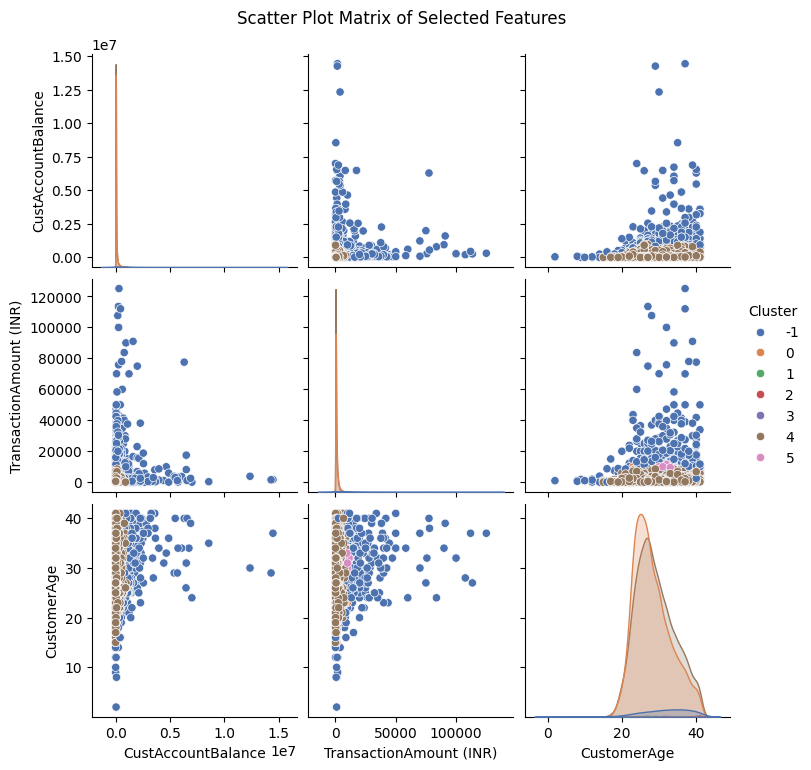

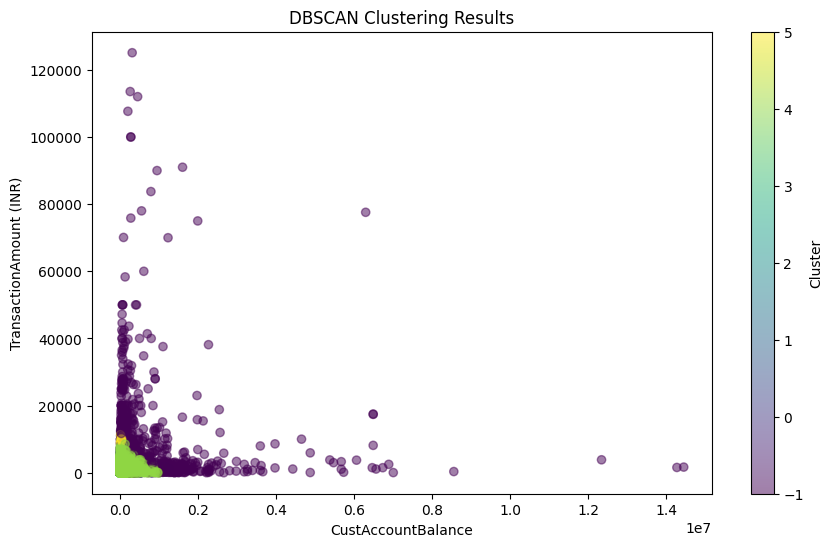

In [3]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Read & Preprocess dataset
bank_cust = pd.read_csv('bank_segmentation.csv')

bank_clean = bank_cust.drop_duplicates()
bank_clean.dropna(inplace=True)

bank_clean['TransactionDate'] = pd.to_datetime(bank_clean['TransactionDate'], errors='coerce')
bank_clean['TransactionYear'] = bank_clean['TransactionDate'].dt.year
bank_clean['CustomerDOB'] = pd.to_datetime(bank_clean['CustomerDOB'], errors='coerce')
bank_clean['CustomerYear'] = bank_clean['CustomerDOB'].dt.year
bank_clean['CustomerAge'] = bank_clean['TransactionYear'] - bank_clean['CustomerYear']

bank_clean = bank_clean[(bank_clean['CustomerAge'] > 0) & (bank_clean['CustomerAge'] < 100)]
bank_clean = bank_clean[bank_clean['CustAccountBalance'] >= bank_clean['TransactionAmount (INR)']]

columns_to_keep = ['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']
bank_clean = bank_clean[columns_to_keep]

# Sample 10,000 records from each gender
sample_size = 10000
bank_clean_sampled = bank_clean.groupby('CustGender').apply(lambda x: x.sample(n=sample_size, random_state=1)).reset_index(drop=True)

# Perform OneHotEncoding
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_gender = onehot_encoder.fit_transform(bank_clean_sampled[['CustGender']])

# Standardize other features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bank_clean_sampled[['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']])

# Combine encoded gender and standardized data
processed_data = pd.DataFrame(data=np.hstack([encoded_gender, scaled_data]),
                                columns=['CustGender_Encoded', 'CustAccountBalance_Scaled', 'TransactionAmount_Scaled', 'CustomerAge_Scaled'])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=8)
clusters = dbscan.fit_predict(processed_data)
bank_clean_sampled['Cluster'] = clusters

# Visualize Cluster result summary statistics
cluster_summary = bank_clean_sampled.groupby('Cluster').agg(
    CustAccountBalance_mean=('CustAccountBalance', 'mean'),
    CustAccountBalance_std=('CustAccountBalance', 'std'),
    TransactionAmount_mean=('TransactionAmount (INR)', 'mean'),
    TransactionAmount_std=('TransactionAmount (INR)', 'std'),
    CustomerAge_mean=('CustomerAge', 'mean'),
    CustomerAge_std=('CustomerAge', 'std'),
    CustGender_distribution=('CustGender', lambda x: x.value_counts(normalize=True).to_dict())
).reset_index()


def highlight_non_std(s):
    return ['color: green' if 'std' not in c else '' for c in s.index]


styled_summary = cluster_summary.style.apply(highlight_non_std, axis=1)
import pandas as pd
from IPython.display import display

styled_summary = cluster_summary.style.apply(highlight_non_std, axis=1)
display(styled_summary)

# Visualize scatter plot matrix of features
features_to_plot = bank_clean_sampled[['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge', 'Cluster']]
sns.pairplot(features_to_plot, hue='Cluster', palette='deep', markers='o')
plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)
plt.show()

# Visualize scatter plot for each feature
plt.figure(figsize=(10, 6))
plt.scatter(bank_clean_sampled['CustAccountBalance'], bank_clean_sampled['TransactionAmount (INR)'], c=bank_clean_sampled['Cluster'],
            cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering Results')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.colorbar(label='Cluster')
plt.show()

### Interpretation:
This project uses DBSCAN clustering to create a customer segmentation model, grouping banking customers by their characteris-tics and transaction patterns. The system then outputs a summary table of each cluster, displaying the mean, standard deviation, and gender distribution of numerical features. A scatter plot matrix and a focused DBSCAN scatter plot offer different visual per-spectives on the resulting clusters, allowing for a more detailed analysis of how each group is related to the others. The automated customer segmentation process allows businesses to better understand their client base, while also allowing them to implement targeted marketing campaigns, provide personalized services, implement new business strategies, and create more optimized and effective decision-making processes. The feature importance chart shows the most relevant factors that differentiate each group, which allows for a better understanding of the clients to focus on them for planning new products and services.

### 3.3 Complaints Management
Data Source: https://www.kaggle.com/datasets/selener/consumer-complaint-database/data

Branch: ML, NLP

Model: Linear Support Vector Classification (SVC)

Methods: Classification, Text Vectorization (TF-IDF), Text Visualization


<ipython-input-4-1bcde8ba6cbd>:14: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crm_complaint.csv')[['Product', 'Consumer complaint narrative']].dropna()


Accuracy: 0.65

				CLASSIFICATION METRICS

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.65      0.67      0.66       569
                                                             Debt collection       0.76      0.81      0.79       588
                                                               Consumer Loan       0.38      0.23      0.29        73
                                                                 Credit card       0.39      0.39      0.39       126
                                                 Credit card or prepaid card       0.38      0.46      0.42       117
                                                                    Mortgage       0.84      0.93      0.88       340
                                                            Credit reporting       0.46      0.39      0.42       214
           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


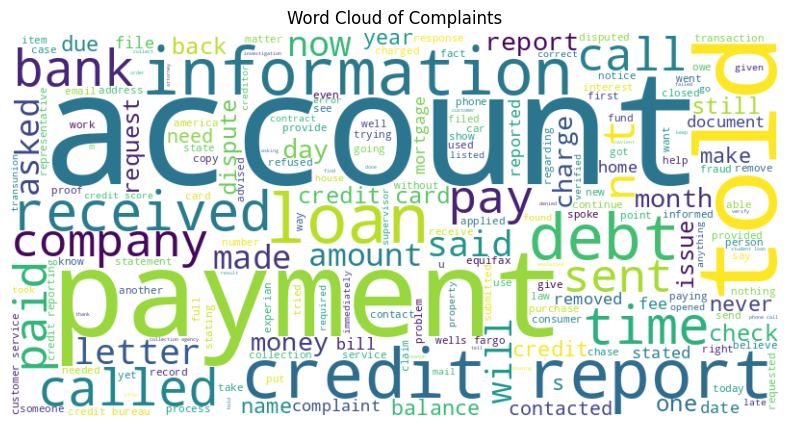

In [4]:
# Import Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import numpy as np

# Read data and keep required columns
df = pd.read_csv('crm_complaint.csv')[['Product', 'Consumer complaint narrative']].dropna()
df.columns = ['Product', 'Complaint']

# Random sampling for quick analysis
sample_size = min(10000, df.shape[0])
df_sample = df.sample(sample_size, random_state=1).copy()
df_sample['category_id'] = df_sample['Product'].factorize()[0]

# Text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'x{2,}', '', text)
    return text

df_sample['Complaint'] = df_sample['Complaint'].apply(clean_text)

# TF-IDF vectorization
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_sample['Complaint'])
labels = df_sample['category_id']

# Split dataset
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_sample.index, test_size=0.25, random_state=1)

# Handle imbalanced data - Oversampling
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define and train LinearSVC model & evaluate it
model = LinearSVC()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\n\t\t\t\tCLASSIFICATION METRICS\n")
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=df_sample['Product'].unique()[unique_labels]))

# Use cases
new_complaint1 = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, I have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
new_complaint2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""

new_complaints = [new_complaint1, new_complaint2]

for i, complaint in enumerate(new_complaints, start=1):
    complaint_vector = tfidf.transform([clean_text(complaint)])
    probabilities = model.decision_function(complaint_vector)
    top_n = 4
    top_n_indices = np.argsort(probabilities[0])[::-1][:top_n]
    print(f"\nPredicted Products for new_complaint{i}:")
    for idx in top_n_indices:
        predicted_product = df_sample['Product'].factorize()[1][idx]
        print(f" - {predicted_product} with score {probabilities[0][idx]:.4f}")

# Generate Word Cloud for Complaints
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Complaints')
    plt.show()

all_complaints_text = ' '.join(df_sample['Complaint'].dropna())
all_complaints_text = clean_text(all_complaints_text)
generate_wordcloud(all_complaints_text)

### Interpretation:
This project creates a complaint categorization system using text analysis, effectively demonstrating a practical use case for text classification. The system employs a machine learning model to automatically assign consumer complaints into predefined product categories, while also providing a word cloud visualization to highlight the most frequently used words in the complaint narratives. This system can be highly valuable within a finance CRM system. By automatically categorizing complaints, finance companies can enhance their CRM processes by managing complaints more efficiently, grouping them by product type for quicker handling and analysis. Furthermore, understanding the most common complaint types—as revealed by the word cloud and model predictions—allows companies to better train their employees on how to address prevalent issues. Finally, the system enables better resource allocation, directing attention and resources to the product types generating the highest complaint volumes, leading to improved customer service, more effective problem-solving, and optimized operations.

## 4. Trading and Operational Automation

### 4.1	Bitcoin Price Prediction & Forecasting
Data Source: Extracted from Yahoo Fiance and stored into csv file by Author

Branch: DL

Models: Long Short-Term Memory (LSTM)

Method: Time Series Prediction and Forecasting

<ipython-input-5-d20c94ec7805>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-5-d20c94ec7805>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['MA60'] = company_data['Close'].rolling(60).mean()
<ipython-input-5-d20c94ec7805>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['MA100'] = c

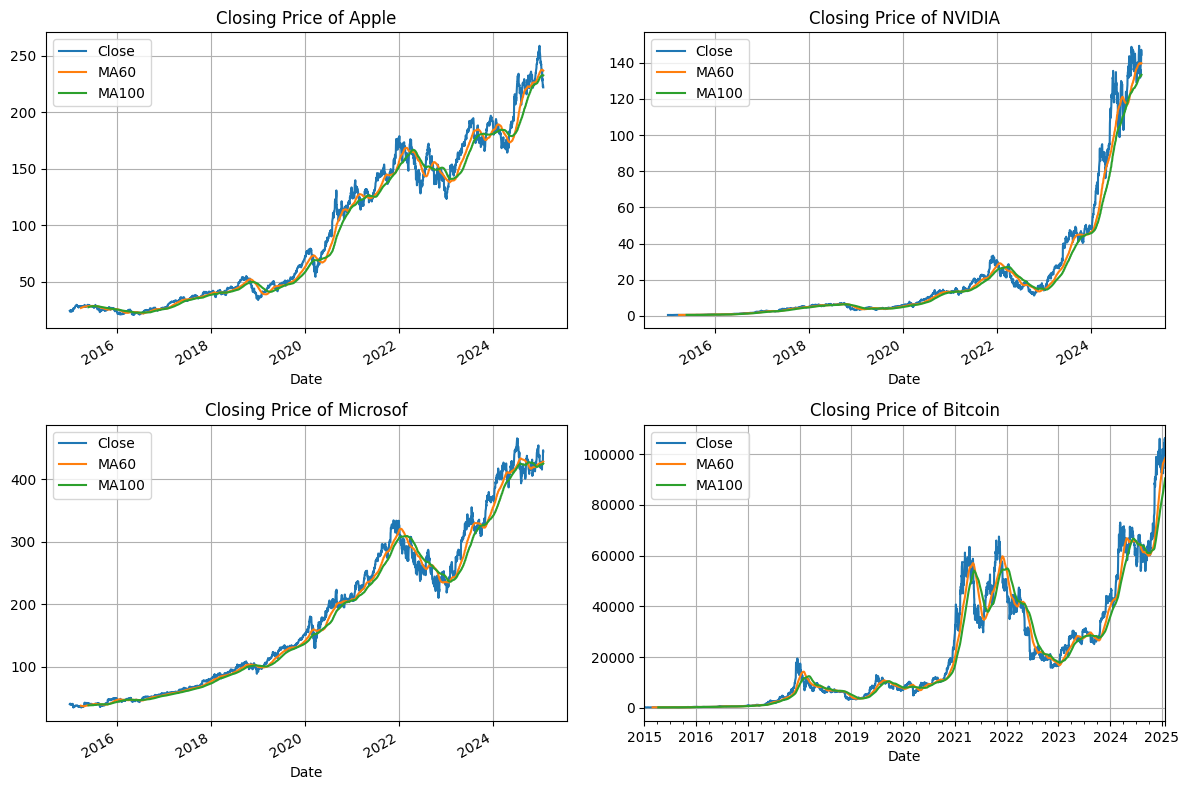

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0051 - val_loss: 6.3924e-04
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 2.3204e-04 - val_loss: 5.7323e-04
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 2.2617e-04 - val_loss: 6.2225e-04
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 2.3697e-04 - val_loss: 5.3245e-04
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 1.5046e-04 - val_loss: 7.1118e-04
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 3.0361e-04 - val_loss: 5.5923e-04
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 1.3176e-04 - val_loss: 3.6599e-04
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 1.3342e-04 - val_loss: 4.9557e-04
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 1.1530e-04 - val_loss: 6.0364e-04
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 1.9400e-04 - val_loss: 3.1776e-04
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 9.3435e-0

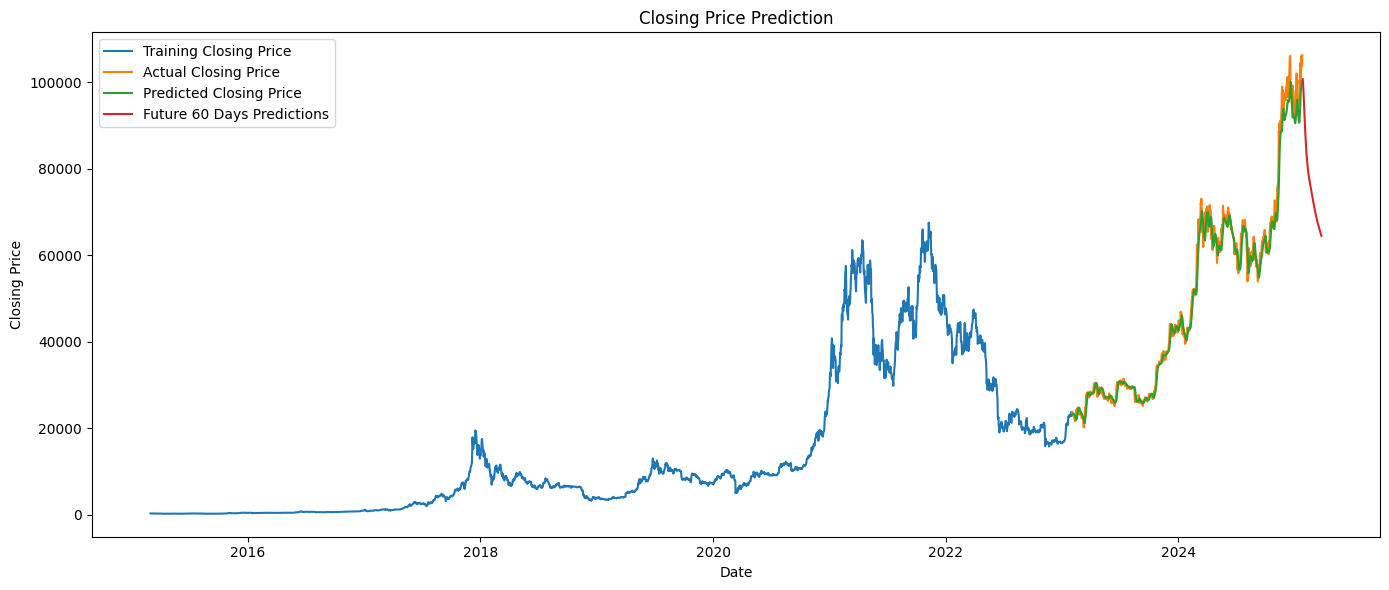

In [5]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np

# Load & preprocess the data
df = pd.read_csv('stock_bitcoin.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Get the list of companies and plot closing prices with moving averages
company_list = df['Company'].unique()
plt.figure(figsize=(12, 8))

for i, company in enumerate(company_list, 1):
    company_data = df[df['Company'] == company]
    company_data['MA60'] = company_data['Close'].rolling(60).mean()
    company_data['MA100'] = company_data['Close'].rolling(100).mean()

    plt.subplot(2, 2, i)
    company_data[['Close', 'MA60', 'MA100']].plot(ax=plt.gca(), title=f"Closing Price of {company}")
    plt.grid()

plt.tight_layout()
plt.show()

# Select Bitcoin data
bitcoin_data = df[df['Company'] == 'Bitcoin'].sort_index()
data = bitcoin_data[['Close']]

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create training and test data
n_steps = 60
X = np.array([scaled_data[i - n_steps:i, 0] for i in range(n_steps, len(scaled_data))])
y = scaled_data[n_steps:, 0]

X = X.reshape(-1, n_steps, 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model & train the model
def build_model(units=50, learning_rate=0.001):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(n_steps, 1)),
        LSTM(units),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

model = build_model()
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_lstm_model.keras', save_best_only=True)
]

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=callbacks, verbose=1)

# Evaluate the model
model.load_weights('best_lstm_model.keras')
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

# Predict future 60 days prices
last_60_days = scaled_data[-n_steps:]
future_predictions = []

for _ in range(60):
    prediction = model.predict(last_60_days.reshape(1, n_steps, 1), verbose=0)
    future_predictions.append(prediction[0, 0])
    last_60_days = np.append(last_60_days[1:], prediction)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Visualization
train_dates = bitcoin_data.index[n_steps:train_size + n_steps]
test_dates = bitcoin_data.index[train_size + n_steps:]
future_dates = pd.date_range(test_dates[-1] + pd.Timedelta(days=1), periods=60)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions = scaler.inverse_transform(model.predict(X_test, verbose=0))

plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_actual, label='Training Closing Price')
plt.plot(test_dates, y_test_actual, label='Actual Closing Price')
plt.plot(test_dates, predictions, label='Predicted Closing Price')
plt.plot(future_dates, future_predictions, label='Future 60 Days Predictions')

plt.title('Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation:
Model Fit: The model accurately reflects the training data's trend, but the prediction underpredicts slightly compared to the actual test data.
Future Forecasting: The model predicts a downward trend for the Bitcoin price over the next 60 days. While the model can capture a general trend, it cannot precisely predict the price on any given day.

### 4.2 Tweets Sentiment
Data Source: https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction/data

Branch: NLP

Models: Vader

Methods: Sentiment Analysis, Time Series Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


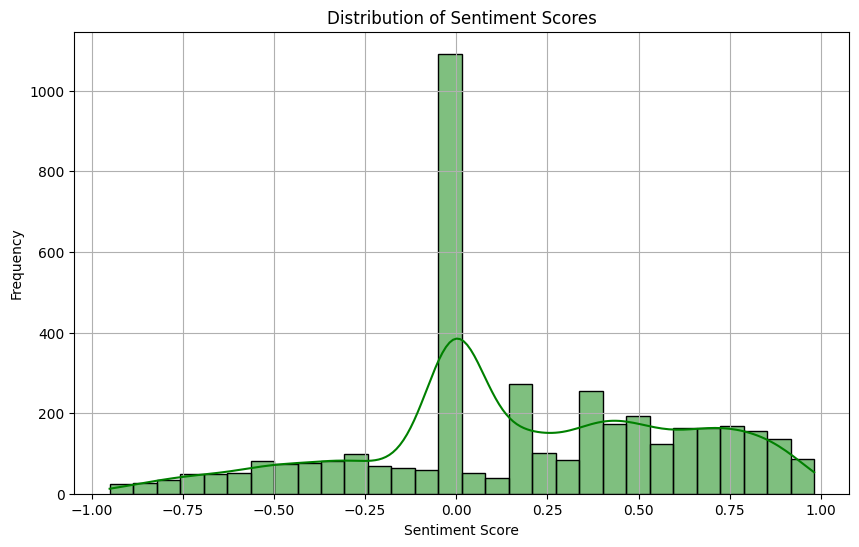

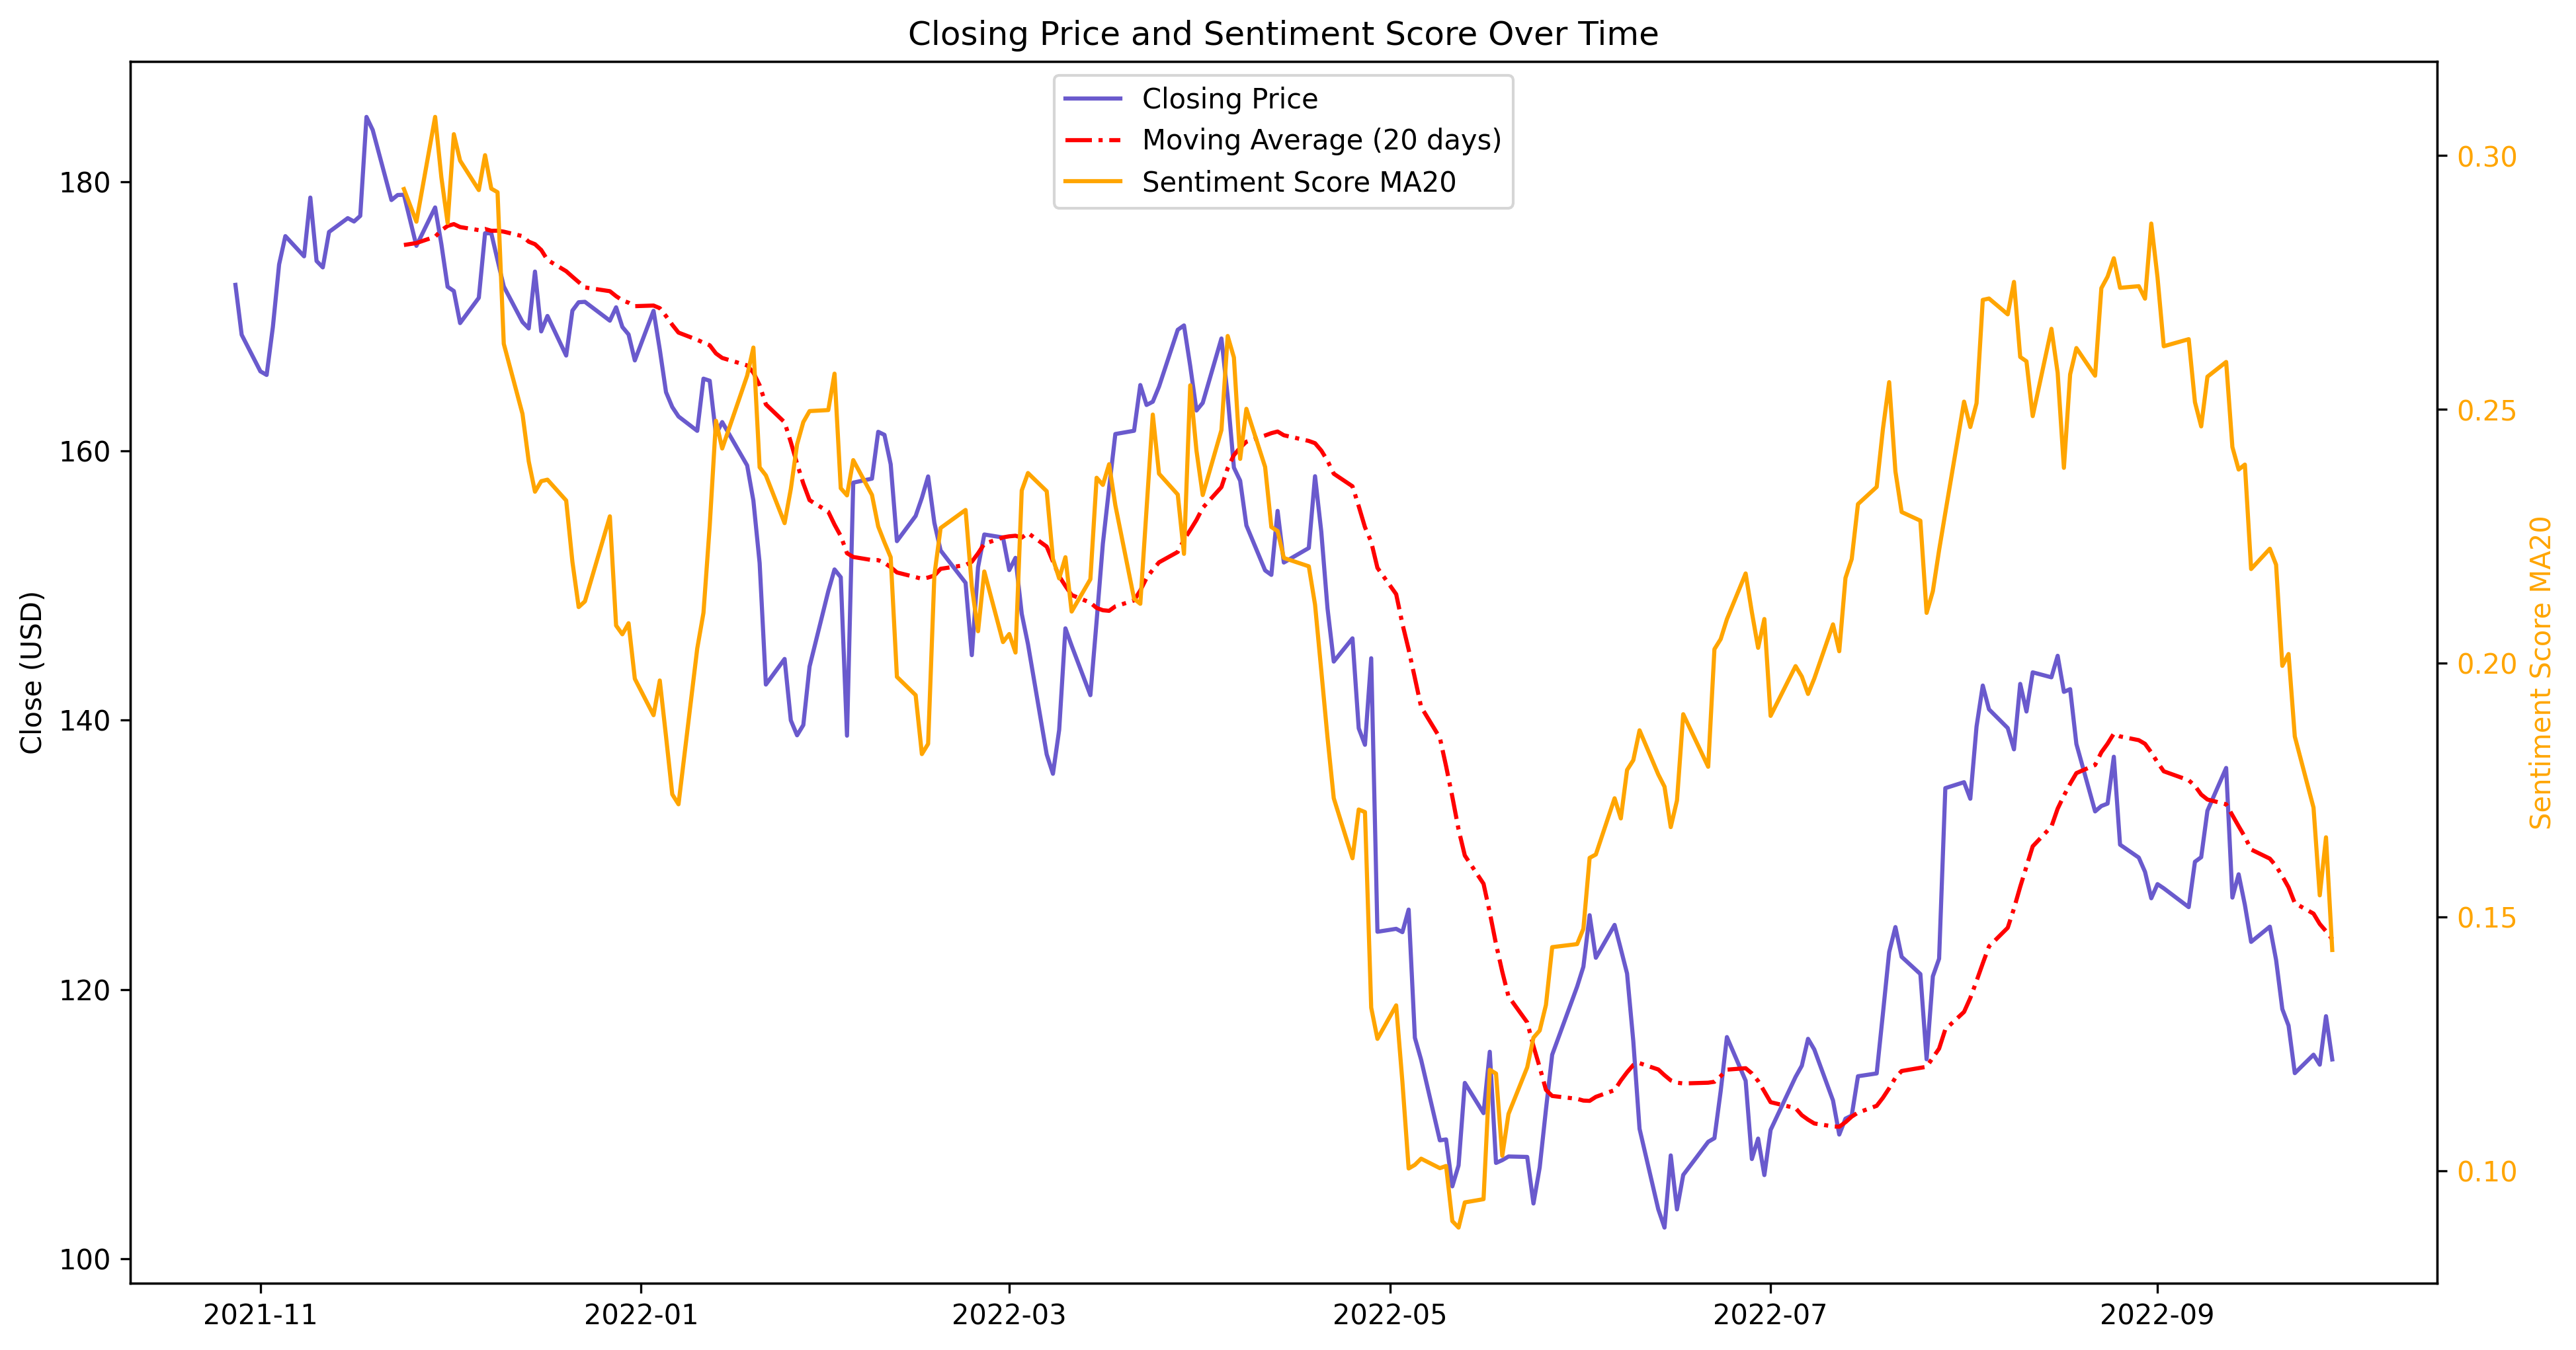

In [7]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import pandas as pd
import nltk

# Download VADER lexicon
try:
    nltk.data.find("sentiment/vader_lexicon")
except LookupError:
    nltk.download('vader_lexicon')


# Read data and select Amazon data
tweets = pd.read_csv('stock_tweets.csv')
stocks = pd.read_csv('stock_yfinance_data.csv')
sent_df = tweets[tweets['Stock Name'] == 'AMZN'].copy()
stock_df = stocks[stocks['Stock Name'] == 'AMZN'].copy()

# Initialize VADER sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()  # Now this should work

# Calculate sentiment scores
def analyze_sentiment(row):
    try:
        sentence = unicodedata.normalize('NFKD', row['Tweet'])
        sentiment = sentiment_analyzer.polarity_scores(sentence)
        return sentiment['compound']
    except TypeError:
        print(f"Error processing Tweet: {row['Tweet']}")
        return None

sent_df['sentiment_score'] = sent_df.apply(analyze_sentiment, axis=1)

# Format dates
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
sent_df['Date'] = pd.to_datetime(sent_df['Date']).dt.date

# Group by date to aggregate average sentiment scores
twitter_df = sent_df.groupby('Date')['sentiment_score'].mean().reset_index()

# Merge stock data and sentiment scores
final_df = pd.merge(stock_df, twitter_df, on='Date', how='inner')
dataset = final_df.iloc[20:, :].reset_index(drop=True)

# Calculate moving averages
dataset['MA20'] = dataset['Close'].rolling(window=20).mean()
dataset['sentiment_score_MA20'] = dataset['sentiment_score'].rolling(window=20).mean()

# Exploratory Data Analysis (EDA): Distribution of sentiment scores
def plot_sentiment_distribution(sentiment_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(sentiment_df['sentiment_score'], bins=30, kde=True, color='green')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Plot: Closing price and sentiment scores
def plot_closing_price_and_sentiment(dataset):
    fig, ax = plt.subplots(figsize=(15, 8), dpi=300)
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')

    ax2 = ax.twinx()
    ax2.plot(dataset['Date'], dataset['sentiment_score_MA20'], label='Sentiment Score MA20', color='orange')
    ax2.set_ylabel('Sentiment Score MA20', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
    plt.title('Closing Price and Sentiment Score Over Time')
    ax.set_ylabel('Close (USD)')
    plt.xlabel("Date")

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, 1), frameon=True)
    plt.xticks(rotation=45)
    plt.show()

# Draw charts
plot_sentiment_distribution(sent_df)
plot_closing_price_and_sentiment(dataset)

### Interpretation:

The histogram of sentiment scores shows that most tweets about Amazon stock express a neutral sentiment, while a smaller number express positive or negative sentiments, indicating a complex public view of the stock.

The time series plot reveals a degree of synchronicity between sentiment scores and stock prices, indicating that they can move in the same direction during certain periods.

The key finding is that, by carefully observing the time series plot, the changes in sentiment scores (orange line) generally tend to precede the changes in the 20-day moving average closing price (red dashed line) slightly. This suggests that changes in sentiment towards Amazon stock on Twitter may, to a certain extent, be reflected in the stock price. In other words, when public sentiment regarding Amazon begins to improve or worsen, the stock price may very well follow in a similar direction shortly thereafter. This further suggests that public sentiment on Twitter could have a potential influence on Amazon's stock price.

### 4.3 Product Recommendation
Data Source: https://www.kaggle.com/c/santander-product-recommendation/data

Branch: ML

Models: Decision Tree Classifier (DTC)

Methods: Hybrid Recommendation System, Cosine Similarity

In [8]:
# Import Libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
import pandas as pd

# Data loading and preprocessing
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['fecha_dato'] = pd.to_datetime(data['fecha_dato'])
    return data.fillna(0).drop('fecha_dato', axis=1)

# Handle imbalanced data - Oversampling
def handle_imbalance(data):
    X, y = data.iloc[:, 1:], data.iloc[:, 0]
    if (y.value_counts() < 5).any():
        print("Some classes have fewer than 5 samples. SMOTE will not be applied.")
        return data
    smote = SMOTE(random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return pd.concat([y_resampled, X_resampled], axis=1)

# Popularity-based recommendations
def popularity_based(df):
    return {col: df[col].value_counts().get(1, 0) / len(df) for col in df.columns[1:]}

# User-item similarity & User similarity recommendations
def compute_user_item_similarity(df):
    df = df.set_index('ncodpers')[:10000]
    return df, 1 - pairwise_distances(df, metric="cosine")

def user_item_recommendations(user_id, df, sim_matrix):
    user_idx = df.index.get_loc(user_id)
    similar_users = {i: sim_matrix[user_idx, i] for i in range(len(df)) if 0.65 < sim_matrix[user_idx, i] < 0.99}
    top_k_users = sorted(similar_users, key=similar_users.get, reverse=True)[:20]
    return {col: df.iloc[top_k_users][col].mean() for col in df.columns}

# Model-based recommendations with accuracy evaluation
def model_based_recommendations(user_id, df):
    model = DecisionTreeClassifier(max_depth=9)
    results = {}
    X = df.drop(columns=df.columns[0])
    for col in df.columns:
        y = df[col].astype(int)
        if y.nunique() < 2:
            results[col] = 0
            continue
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print(f"Accuracy for {col}: {acc:.2f}")
        results[col] = model.predict_proba(X.loc[[user_id]])[0, 1] if user_id in X.index else 0
    return results

# Create hybrid recommendation system
def hybrid_recommendations(user_id, df, f1=0.5, f2=0.25, f3=0.25):
    popularity = popularity_based(df)
    df_ui, sim_matrix = compute_user_item_similarity(df)
    user_sim = user_item_recommendations(user_id, df_ui, sim_matrix)
    model_sim = model_based_recommendations(user_id, df.set_index('ncodpers'))
    return {k: f1 * popularity.get(k, 0) + f2 * user_sim.get(k, 0) + f3 * model_sim.get(k, 0) for k in df.columns[1:]}

# Product name mapping and recommendation display
product_names = {"ind_ahor_fin_ult1": "Saving Account", "ind_aval_fin_ult1": "Guarantees", "ind_cco_fin_ult1": "Current Accounts",
                 "ind_cder_fin_ult1": "Derivada Account", "ind_cno_fin_ult1": "Payroll Account", "ind_ctju_fin_ult1": "Junior Account",
                 "ind_ctma_fin_ult1": "Más Particular Account", "ind_ctop_fin_ult1": "Particular Account", "ind_ctpp_fin_ult1": "Particular Plus Ac-count",
                 "ind_deco_fin_ult1": "Short-term Deposits", "ind_deme_fin_ult1": "Medium-term Deposits", "ind_dela_fin_ult1": "Long-term Depos-its",
                 "ind_ecue_fin_ult1": "E-account", "ind_fond_fin_ult1": "Funds", "ind_hip_fin_ult1": "Mortgage",
                 "ind_plan_fin_ult1": "Pensions", "ind_pres_fin_ult1": "Loans", "ind_reca_fin_ult1": "Taxes",
                 "ind_tjcr_fin_ult1": "Credit Card", "ind_valo_fin_ult1": "Securities", "ind_viv_fin_ult1": "Home Account",
                 "ind_nomina_ult1": "Payroll", "ind_nom_pens_ult1": "Pensions", "ind_recibo_ult1": "Direct Debit"}

def recommend(user_id, df, hybrid_result):
    owned = df.loc[user_id][df.loc[user_id] == 1].index
    recommendations = {k: v for k, v in hybrid_result.items() if k not in owned}
    top_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:5]
    return [product_names[k] for k, _ in top_recommendations]

# Use Case Samples
file_path = 'train_ver2.csv.zip'  # Replace with your data file path
data = load_and_preprocess_data(file_path)

# Handle imbalance
balanced_data = handle_imbalance(data)

# User ID list
user_ids = [788356, 322724, 1360256]

# Collect all users' recommendation results
all_recommendations = [[user_id, recommend(user_id, balanced_data.set_index('ncodpers'), hybrid_recommendations(user_id, balanced_data))] for user_id in user_ids]

# Display recommendation results using tabulate
print(tabulate(all_recommendations, headers=["User ID", "Top 5 Recommendations"], tablefmt="grid"))

Some classes have fewer than 5 samples. SMOTE will not be applied.
Accuracy for ind_ahor_fin_ult1: 1.00
Accuracy for ind_cco_fin_ult1: 1.00
Accuracy for ind_cder_fin_ult1: 1.00
Accuracy for ind_cno_fin_ult1: 1.00
Accuracy for ind_ctju_fin_ult1: 1.00
Accuracy for ind_ctma_fin_ult1: 1.00
Accuracy for ind_ctop_fin_ult1: 1.00
Accuracy for ind_ctpp_fin_ult1: 1.00
Accuracy for ind_deco_fin_ult1: 1.00
Accuracy for ind_deme_fin_ult1: 1.00
Accuracy for ind_dela_fin_ult1: 1.00
Accuracy for ind_ecue_fin_ult1: 1.00
Accuracy for ind_fond_fin_ult1: 1.00
Accuracy for ind_hip_fin_ult1: 1.00
Accuracy for ind_plan_fin_ult1: 1.00
Accuracy for ind_pres_fin_ult1: 1.00
Accuracy for ind_reca_fin_ult1: 1.00
Accuracy for ind_tjcr_fin_ult1: 1.00
Accuracy for ind_valo_fin_ult1: 1.00
Accuracy for ind_viv_fin_ult1: 1.00
Accuracy for ind_nomina_ult1: 1.00
Accuracy for ind_nom_pens_ult1: 1.00
Accuracy for ind_recibo_ult1: 1.00
Accuracy for ind_ahor_fin_ult1: 1.00
Accuracy for ind_cco_fin_ult1: 1.00
Accuracy for ind_

### Interpretation:
This project develops a hybrid recommendation system designed to provide personalized banking product recommendations by combining different approaches. The system aims to offer a balanced approach for users to discover relevant products, which in turn enhances customer engagement, satisfaction, and the overall product discovery experience. The system outputs a list of each cus-tomer's top 5 product recommendations, and these personalized recommendations can ultimately increase product adoption rates, support cross-selling opportunities, and contribute to business growth within the banking sector.

### 4.4 Invoice Information Extraction
Data Source: Created by Author

Branch: NLP, Visual Recognition

Model: Computer Vision-Tesseract OCR Engine

Methods: Optical Character Recognition (OCR), Text Processing

In [4]:
# Import Libraries
import cv2
import pytesseract
import re
import pandas as pd
from IPython.display import display

# Load the invoice image
image = cv2.imread("InvoiceCopy.png")

# Check if image loaded successfully
if image is None:
    raise FileNotFoundError("Could not open or find the image: InvoiceCopy.png")

# Set custom Tesseract configuration
custom_config = r'--oem 3 --psm 6'

# Extract text from the image using Tesseract OCR
try:
    text = pytesseract.image_to_string(image, config=custom_config)
    print("Recognized Full Text:\n", text)
except Exception as e:
    print(f"Error during OCR: {e}")
    text = ""  # Set text to an empty string to prevent further errors

# Define the fields to extract
fields = ["Invoice:", "BILLED TO:", "PAY TO:", "Bank", "Account Name", "BSB", "Account Number", "Due Total"]

# Extract the specified fields from the text
extracted_data = {}
for field in fields:
    match = re.search(rf'{field}\s*(.+)', text)
    if match:
        value = match.group(1).strip().replace(":", "")
        extracted_data[field.replace(":", "")] = value

# Display the extracted information and Save to Excel
print("\nExtracted Information:")
for key, value in extracted_data.items():
    print(f"{key}: {value}")

df = pd.DataFrame(list(extracted_data.items()), columns=["Field", "Value"])
excel_file_path = '/content/extracted_invoice_data.xlsx'
df.to_excel(excel_file_path, index=False)
display(df)

Recognized Full Text:
 ‘A Invoice: 123456
Due Total: $875.00
BILLED TO: Really Great Company
PAY TO: Avery Davis
123 Anywhere St., Any City
123-456-7890
Bank Really Great
Account Name John Smith
BSB 000-000
Account Number 0000 0000
DESCRIPTION RATE HOURS AMOUNT
Content Plan $50/hr 4 $200.00
Copy Writing $50/hr 2 $100.00
Website Design $50/hr 5 $250.00
Website Development $100/hr 5 $500.00
SEO $50/hr 1 $200.00
Sub-Total $1,250.00
Package Discount (30%) $375.00


Extracted Information:
Invoice: 123456
BILLED TO: Really Great Company
PAY TO: Avery Davis
Bank: Really Great
Account Name: John Smith
BSB: 000-000
Account Number: 0000 0000
Due Total:  $875.00


,Field,Value
0,Invoice,123456
1,BILLED TO,Really Great Company
2,PAY TO,Avery Davis
3,Bank,Really Great
4,Account Name,John Smith
5,BSB,000-000
6,Account Number,0000 0000
7,Due Total,$875.00


### Interpretation:
This project uses the Tesseract OCR engine to extract key information from an invoice image and saves the extracted values into an Excel file and a dictionary. Its main value is to automate the process of extracting data from invoices and other images, saving time and allowing for easier data analysis. The extracted data can then be readily imported into various systems, enabling faster and more accurate payment processing and accelerating trading by providing key details in a structured format.